### Домашнее задание к лекции «Feature Selection»

1. Взять датасет:
(https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_covtype.html#sklearn.datasets.fetch_covtype)

2. Провести EDA
3. Построить зависимость между качеством модели и количеством отобранных признаков. Т.е. надо обучать модель на количестве признаков от одного до максимально возможного.

In [2]:
# Подгружаю нужные библиотеки:

from sklearn.datasets import fetch_covtype
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import seaborn as sns

import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor

In [3]:
print(fetch_covtype()['DESCR'])

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30Г—30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like 'Bunch' object
with the feature matrix in the ``data`` member
and the target values in ``target``. If optional 

In [4]:
# data = fetch_covtype()
data = fetch_covtype(as_frame=True).frame
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  float64
 7   Hillshade_Noon                      581012 non-null  float64
 8   Hillshade_3pm                       581012 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 10  Wilderness_Area_0                   581012 non-null  float64
 11  Wilderness_Area_1         

In [6]:
data.shape

(581012, 55)

581012 строк и 55 колонок (одна из них - целевая (target): Cover_Type)
Пропусков нет. И это радует...
Значения: числовые (float64 и int32)

## Посмотрю на целевую переменную:

In [7]:
data.Cover_Type.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

#### Значения от 1 до 7

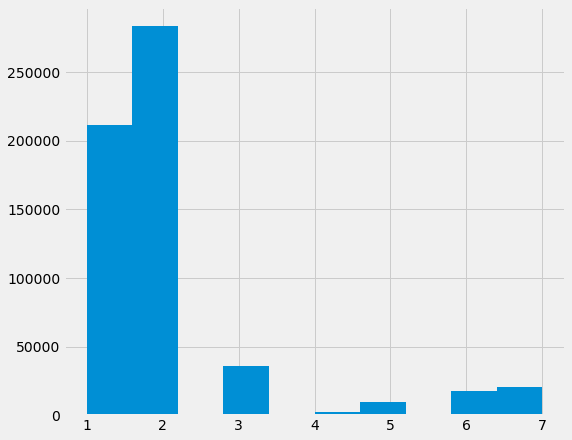

In [8]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [8,7]

plt.hist(data.Cover_Type)
plt.show()

# Посмотрю на значимость параметров:

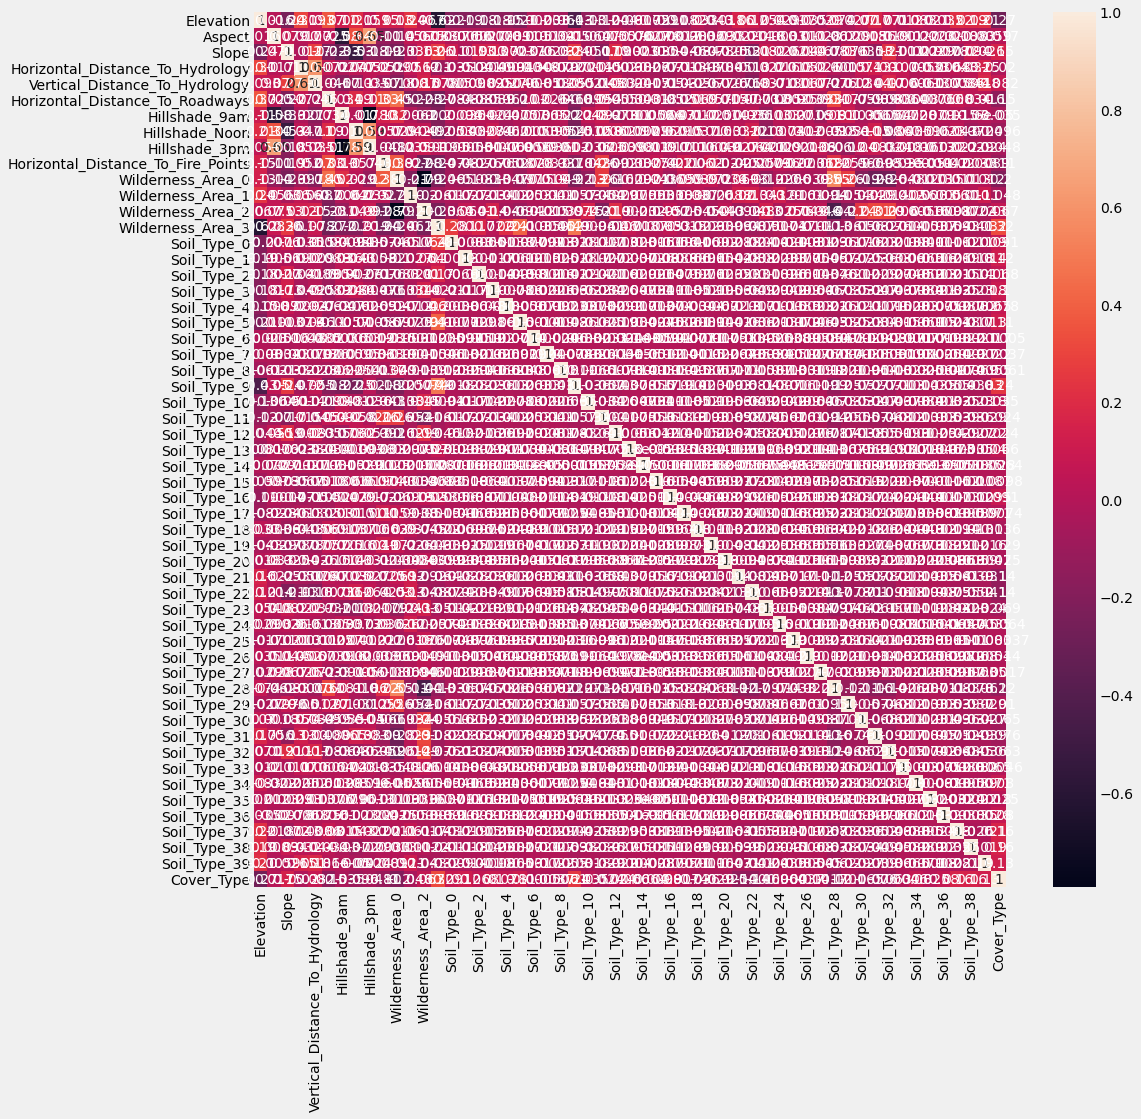

In [9]:
corr = data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(data=corr,annot=True)
plt.show()

In [ ]:
# в таком виде трудно что разобрать.

In [10]:
# Выведу в виде простой таблицы.
# Но данных много и поэтому трудно с ними и в таком варианте работать.
corr = data.corr()
corr

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022,...,0.167077,0.070633,0.011731,0.083005,0.021107,0.035433,0.217179,0.193595,0.212612,-0.269554
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172,...,0.056233,0.019163,0.010861,-0.021991,0.002281,-0.020398,0.017706,0.008294,-0.005866,0.017080
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,...,-0.133504,0.208942,-0.011002,-0.022228,0.002918,0.007848,-0.072208,0.093602,0.025637,0.148285
Horizontal_Distance_To_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874,...,0.127217,0.101195,0.070268,-0.005231,0.033421,-0.006802,0.043031,0.031922,0.147020,-0.020317
Vertical_Distance_To_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913,...,0.039762,0.167091,0.060274,-0.006092,0.012955,-0.007520,-0.008629,0.043859,0.179006,0.081664
Horizontal_Distance_To_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580,...,-0.089019,-0.082779,0.006390,-0.003000,0.007550,0.016313,0.079778,0.033762,0.016052,-0.153450
Hillshade_9am,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669,...,0.006494,-0.064381,0.007154,0.027870,0.007865,0.010332,0.015108,-0.029620,-0.000016,-0.035415
Hillshade_Noon,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329,...,0.125395,-0.086164,0.043061,0.005863,0.016239,-0.022707,0.042952,-0.071961,-0.040176,-0.096426
Hillshade_3pm,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981,...,0.083066,-0.024393,0.017757,-0.016482,0.001330,-0.022064,0.022187,-0.029040,-0.024254,-0.048290
Horizontal_Distance_To_Fire_Points,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000,...,-0.089977,-0.059067,-0.035067,-0.000081,-0.010595,0.004180,-0.019740,-0.003301,0.008915,-0.108936


In [11]:
# Беру последнюю строку из corr, сортирую по убыванию и вывожу первых 25 значений
# corr.iloc[-1]
corr1last = abs(corr.iloc[-1]).sort_values(ascending=False)
corr1last[0:25]

Cover_Type                            1.000000
Wilderness_Area_3                     0.323200
Elevation                             0.269554
Soil_Type_9                           0.243876
Wilderness_Area_0                     0.203913
Soil_Type_37                          0.160170
Soil_Type_38                          0.155668
Horizontal_Distance_To_Roadways       0.153450
Slope                                 0.148285
Soil_Type_21                          0.141746
Soil_Type_22                          0.135055
Soil_Type_39                          0.128351
Soil_Type_28                          0.124933
Soil_Type_1                           0.118135
Soil_Type_5                           0.112958
Horizontal_Distance_To_Fire_Points    0.108936
Soil_Type_3                           0.099672
Hillshade_Noon                        0.096426
Soil_Type_0                           0.090828
Soil_Type_16                          0.090582
Vertical_Distance_To_Hydrology        0.081664
Soil_Type_34 

#### Вижу:

#### Самые высокие коэф. кореляции у следующих параметров

Wilderness_Area_3                     0.323200
Elevation                             0.269554
Soil_Type_9                           0.243876
Wilderness_Area_0                     0.203913
Soil_Type_37                          0.160170
Soil_Type_38                          0.155668
Horizontal_Distance_To_Roadways       0.153450
Slope                                 0.148285
Soil_Type_21                          0.141746
Soil_Type_22                          0.135055
Soil_Type_39                          0.128351
Soil_Type_28                          0.124933
Soil_Type_1                           0.118135
Soil_Type_5                           0.112958
Horizontal_Distance_To_Fire_Points    0.108936

## Отлично: начало есть.

#### Также посмотрю зависимости между конкретными переменными на графиках pairplot.
#### Также здесь можно увидеть выбросы или пропущенные значения.
##### Единственное ограничу график только несколькими переменными:

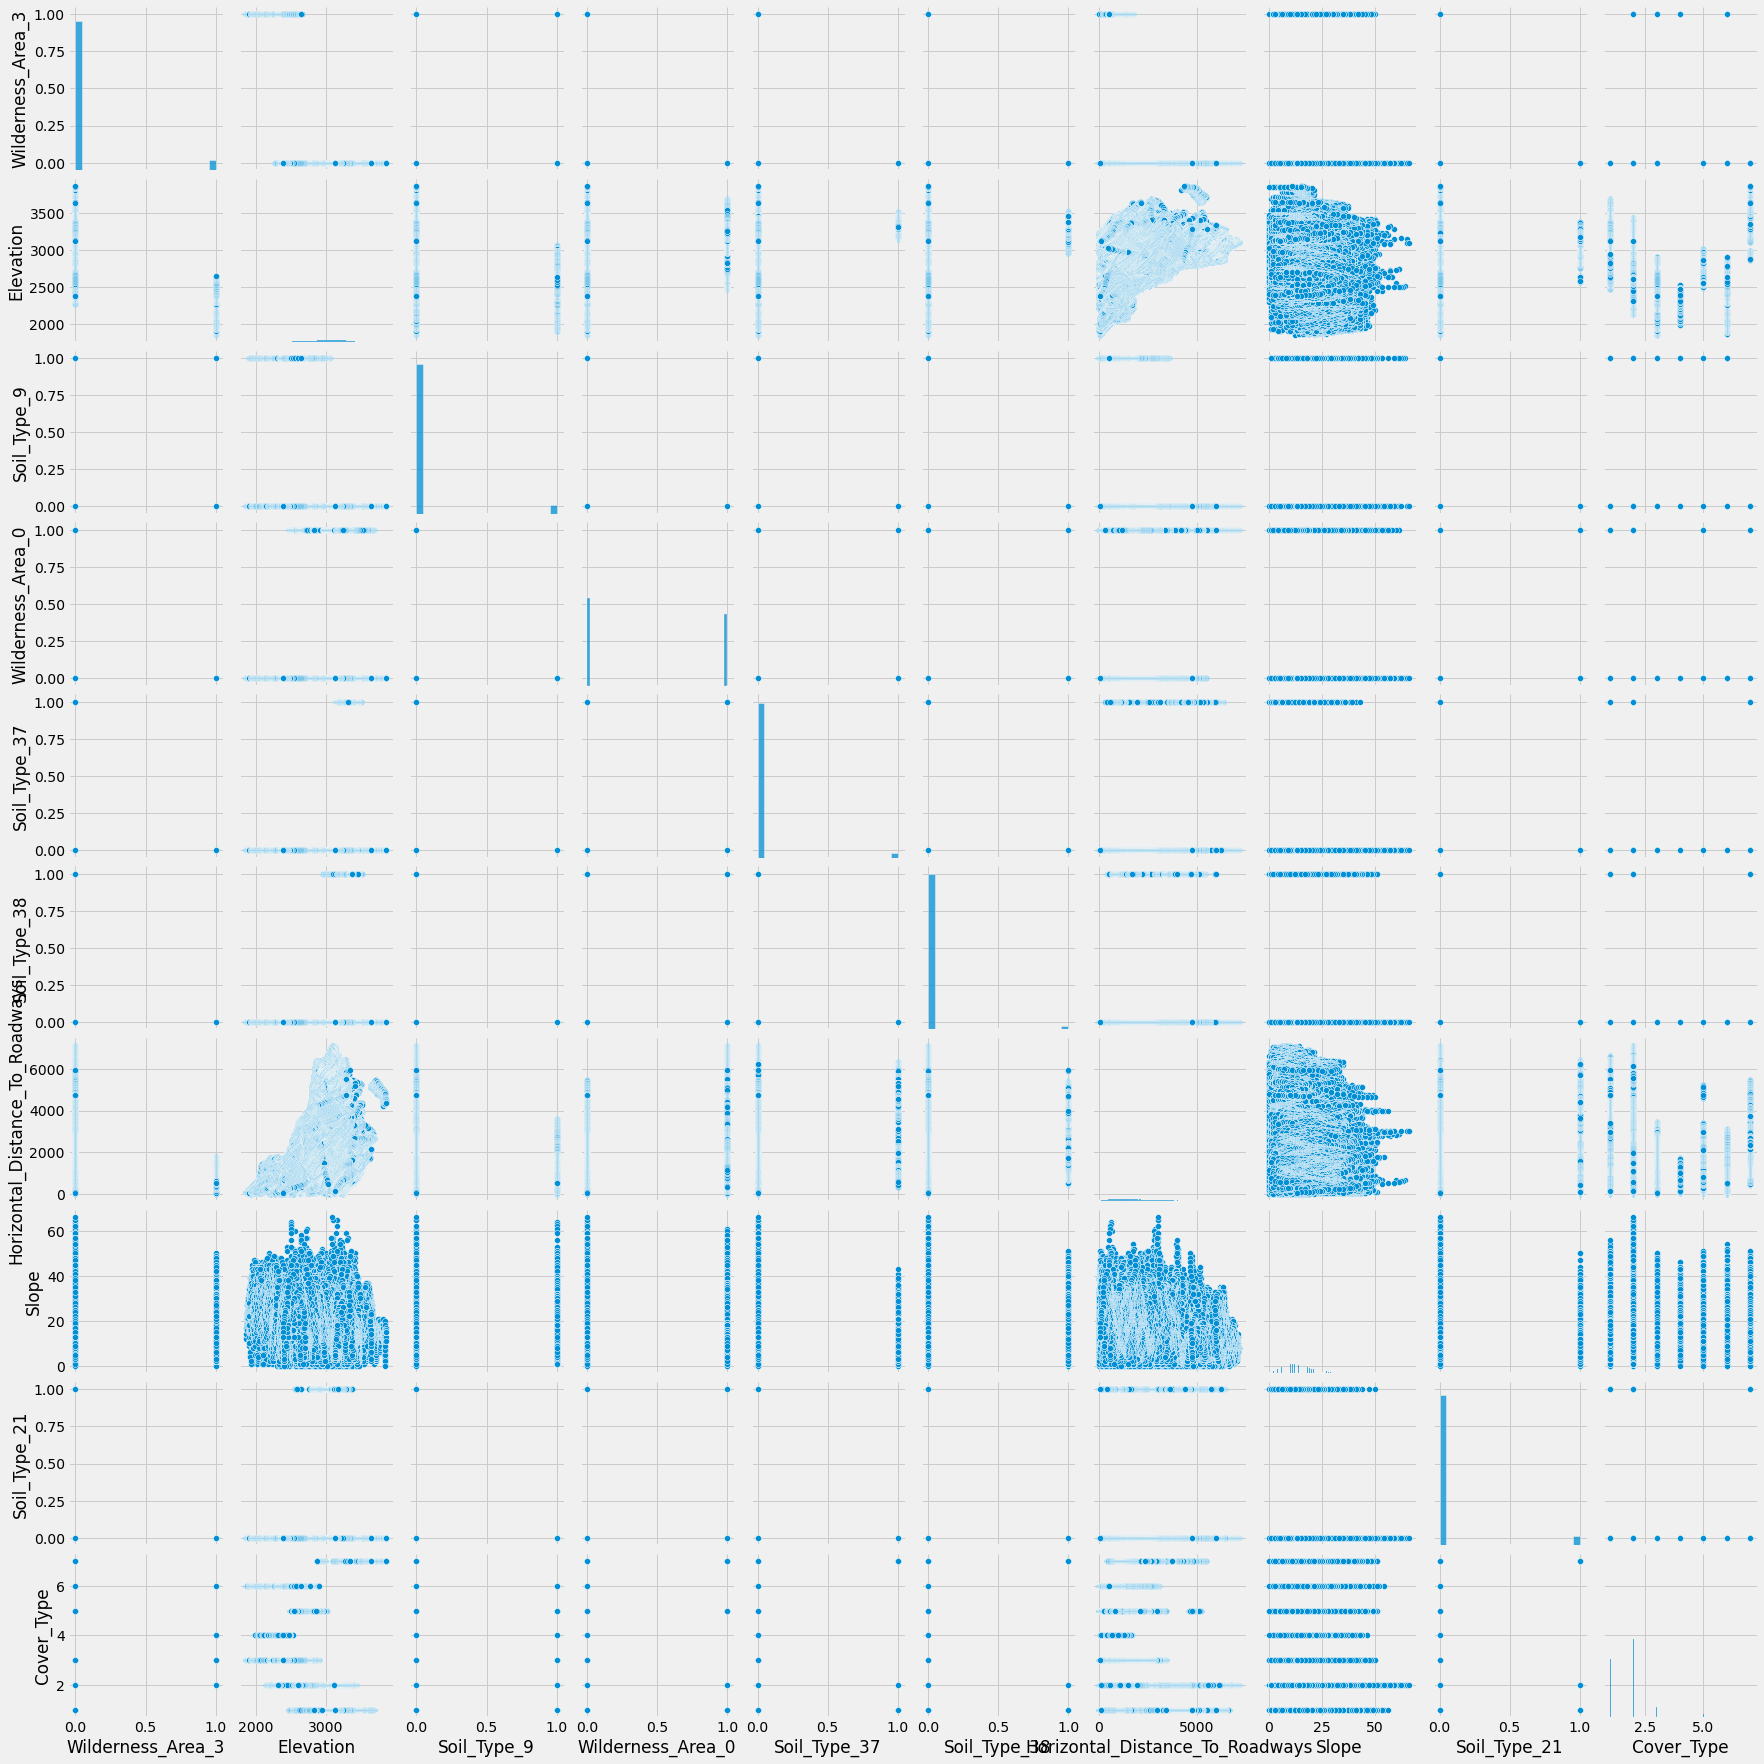

In [12]:
sns.pairplot(data[['Wilderness_Area_3','Elevation','Soil_Type_9','Wilderness_Area_0','Soil_Type_37','Soil_Type_38',\
                   'Horizontal_Distance_To_Roadways','Slope','Soil_Type_21','Cover_Type']])

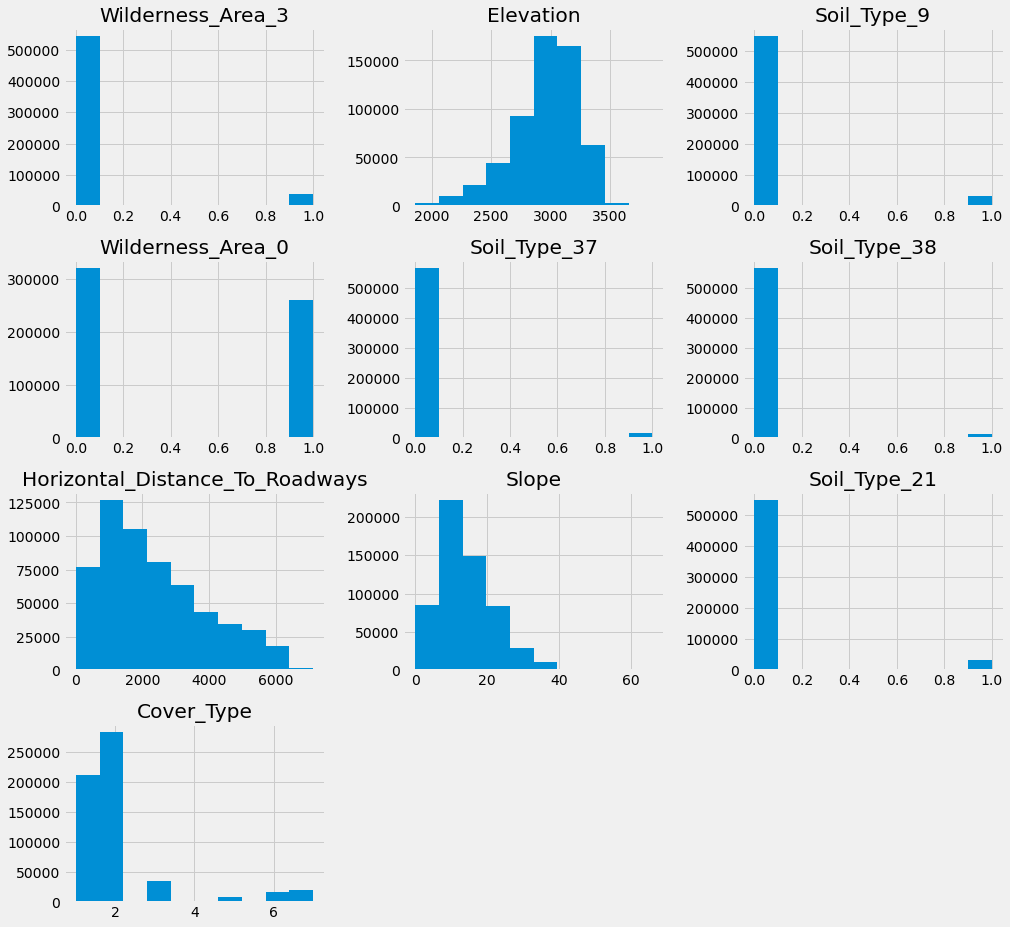

In [13]:
data[['Wilderness_Area_3','Elevation','Soil_Type_9','Wilderness_Area_0','Soil_Type_37','Soil_Type_38',\
                   'Horizontal_Distance_To_Roadways','Slope','Soil_Type_21','Cover_Type']].hist(figsize = (15,15))
plt.show()

In [14]:
# Буду использовать линейную регрессию для того чтобы понять как хорошо или плохо сказываются количество
# признаков на качестве работы моодели.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
# Определяю функцию
def get_score(ddaa):
    # print(ddaa.info())
    DATA_v = ddaa.drop('Cover_Type', axis=1)
    target_v = ddaa['Cover_Type']
    
    model = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(DATA_v, target_v, test_size=0.3, random_state=42)  
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [16]:
get_score(data)

0.31641067058782324

### Это score, посчитанный на всех данных (признаках) как есть.
### Значение сосвсем плачевное... но нам сейчас важен не этот результат, а зависимость.
### Смотрим дальше...

Попробую обучать последовательно в цикле и график:

In [17]:
### Подготовлю данные для построения графика зависимости качества модели от количества отобранных признаков

xx1=[]
yy1=[]
cols1=['Cover_Type']
interval = range(0, 55, 1)
for i in interval:
    # print(i, corr1last.index[i])
    if i==0:
        continue
    xx1.append(i)
    cols1.append(corr1last.index[i])
    yy1.append(get_score(data[cols1]))

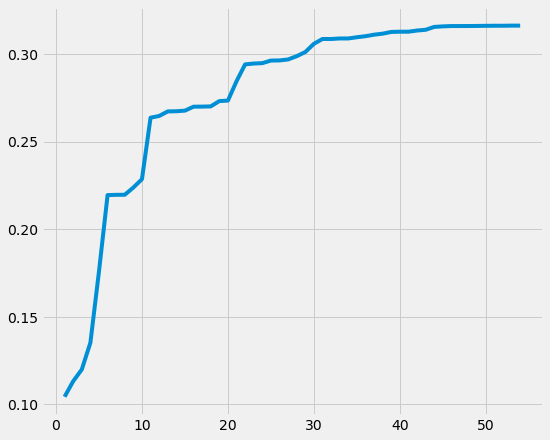

<Figure size 720x1512 with 0 Axes>

In [18]:
fig1, ax1 = plt.subplots()
ax1 = ax1.plot(xx1,yy1)
plt.figure(figsize=(10,21))
plt.show()

## Получил зависимость качества модели от количества отобранных признаков
#### Причем в начале графика обучение проходило лучшими параметрами...

## Попрбую оценить значимость признаков еще одним способом.

## Попробую теперь использовать регрессию метода случайного леса.

In [19]:
# Определяю функцию
def get_score_rfr(ddaa):
    # print(ddaa.info())
    DATA_v = ddaa.drop('Cover_Type', axis=1)
    target_v = ddaa['Cover_Type']
    
    model = RandomForestRegressor()
    X_train, X_test, y_train, y_test = train_test_split(DATA_v, target_v, test_size=0.3, random_state=42)  
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [20]:
get_score_rfr(data)

0.9227786555551563

In [295]:
data.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_0',
       'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3',
       'Soil_Type_0', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3',
       'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7',
       'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11',
       'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15',
       'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19',
       'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23',
       'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27',
       'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31',
       'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35',
       'Soil_Type_36', 'S

### В данном случае score изначальный намного лучше.

### Посмотрю на лучшие признаки

In [25]:
DATA_v = data.drop('Cover_Type', axis=1)
target_v = data['Cover_Type']
rfr = RandomForestRegressor(random_state=22)
X_train, X_test, y_train, y_test = train_test_split(DATA_v, target_v, test_size=0.3, random_state=42)
model2 = rfr.fit(X_train, y_train)

In [26]:
# Получаю наименования показателей и их важность в обучении. Сортирую по убыванию
ind=[]
zna=[]

for i in range(len(data.columns)-1):
    # print(f"{data.columns[i]}\t {rfr.feature_importances_[i]:.4f}")
    ind.append(data.columns[i])
    zna.append(rfr.feature_importances_[i])
corr2last = pd.Series(zna, index=ind)
corr2last = corr2last.sort_values(ascending=False)
corr2last

Elevation                             3.338995e-01
Horizontal_Distance_To_Fire_Points    1.358493e-01
Horizontal_Distance_To_Roadways       1.309109e-01
Horizontal_Distance_To_Hydrology      4.602379e-02
Vertical_Distance_To_Hydrology        4.431746e-02
Wilderness_Area_2                     4.322648e-02
Soil_Type_31                          3.500129e-02
Aspect                                2.997653e-02
Hillshade_9am                         2.726428e-02
Hillshade_3pm                         2.660620e-02
Hillshade_Noon                        2.424468e-02
Wilderness_Area_0                     1.668562e-02
Slope                                 1.663103e-02
Soil_Type_38                          1.533117e-02
Soil_Type_37                          8.017451e-03
Soil_Type_34                          6.304236e-03
Soil_Type_9                           5.271585e-03
Soil_Type_32                          5.234301e-03
Wilderness_Area_1                     5.170761e-03
Soil_Type_39                   

### Построю график значимости (важности) параметров:

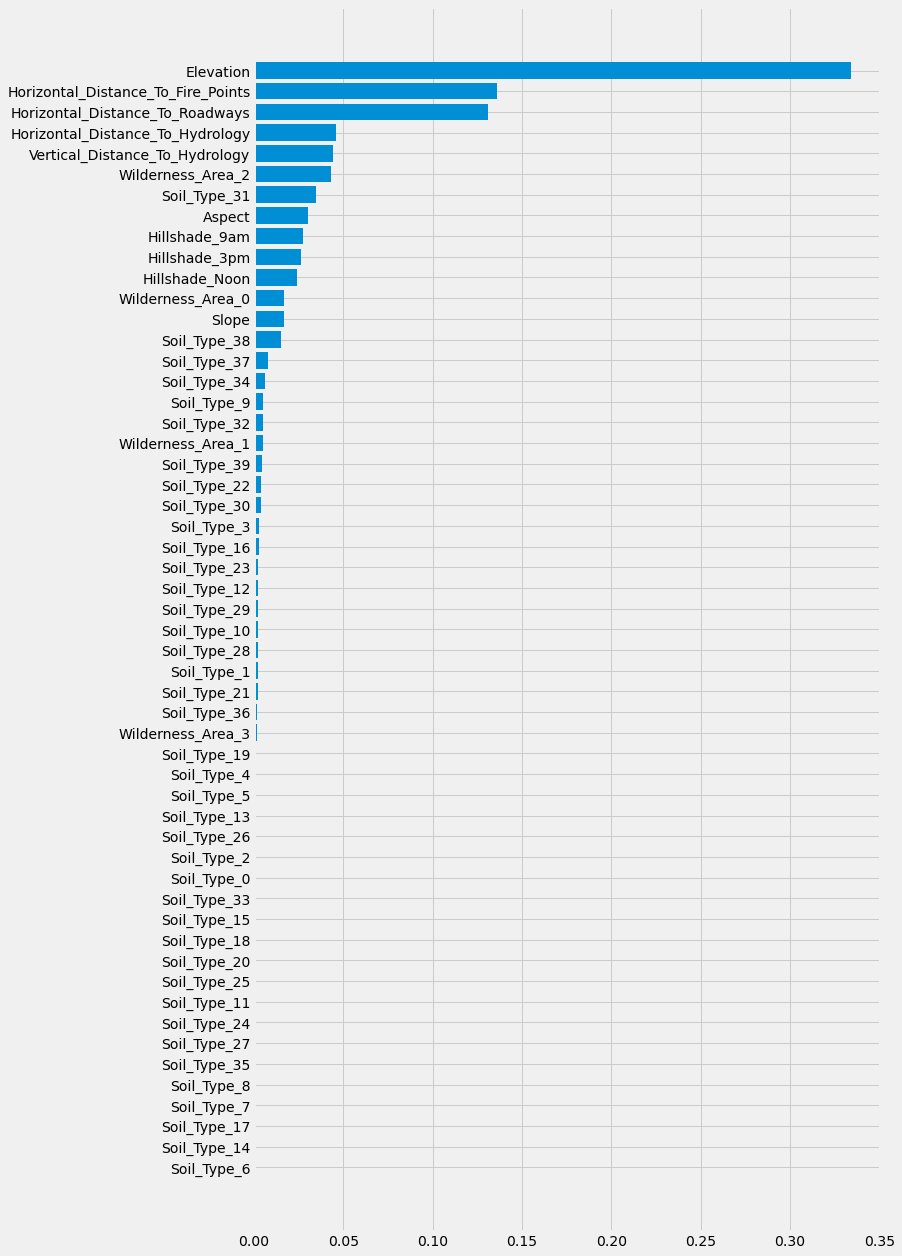

In [27]:
corr2last = corr2last.sort_values(ascending=True)
plt.figure(figsize=(10,21))
plt.barh(corr2last.index, corr2last)
plt.show()

#### Самые значимые оказались:
Elevation                             3.338995e-01
Horizontal_Distance_To_Fire_Points    1.358493e-01
Horizontal_Distance_To_Roadways       1.309109e-01
Horizontal_Distance_To_Hydrology      4.602379e-02
Vertical_Distance_To_Hydrology        4.431746e-02
Wilderness_Area_2                     4.322648e-02
итд

In [28]:
### Подготовлю данные для построения графика зависимости качества модели от количества отобранных признаков
### В данном случае ограничиваюсь 14 точками...

corr2last = corr2last.sort_values(ascending=False)

xx2=[]
yy2=[]
cols2=['Cover_Type']
interval = range(0, 15, 1)
for i in interval:
    xx2.append(i+1)
    cols2.append(corr2last.index[i])
    yy2.append(get_score_rfr(data[cols2]))
yy2

[0.2814608859731217,
 0.1862866793627148,
 0.7178040535365428,
 0.8526038339548946,
 0.8793920791686952,
 0.8951140785308396,
 0.8951973717784266,
 0.9130844326440075,
 0.9143816190376418,
 0.9126186874091532,
 0.9121934990916317,
 0.9125518630017231,
 0.910790637000738,
 0.912673482390069,
 0.9118982183077347]

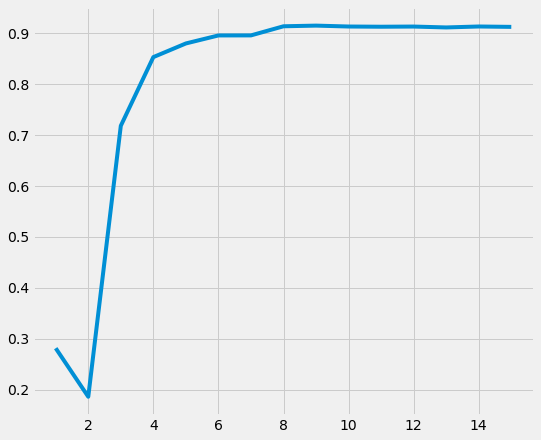

<Figure size 720x1512 with 0 Axes>

In [29]:
fig2, ax2 = plt.subplots()
ax2 = ax2.plot(xx2,yy2)
plt.figure(figsize=(10,21))
plt.show()

#### После 8 точки выходим на 0,91 и дальше держится на том же уровне...

## Еще один вариант

In [30]:
from sklearn.ensemble import ExtraTreesClassifier

In [36]:
# Определяю функцию
def get_score_etc(ddaa):
    DATA_v = ddaa.drop('Cover_Type', axis=1)
    target_v = ddaa['Cover_Type']
    
    model = ExtraTreesClassifier()
    X_train, X_test, y_train, y_test = train_test_split(DATA_v, target_v, test_size=0.3, random_state=42)  
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [37]:
get_score_etc(data)

0.9509936662382963

### Посмотрю на лучшие признаки

In [32]:
etc = ExtraTreesClassifier()
model3 = etc.fit(X_train, y_train)

In [33]:
# Получаю наименования показателей и их важность в обучении. Сортирую по убыванию
ind3=[]
zna3=[]

for i in range(len(data.columns)-1):
    # print(f"{data.columns[i]}\t {etc.feature_importances_[i]:.4f}")
    ind3.append(data.columns[i])
    zna3.append(etc.feature_importances_[i])
corr3last = pd.Series(zna3, index=ind3)
corr3last = corr3last.sort_values(ascending=False)
corr3last

Elevation                             0.194591
Horizontal_Distance_To_Roadways       0.108136
Horizontal_Distance_To_Fire_Points    0.103169
Horizontal_Distance_To_Hydrology      0.063868
Vertical_Distance_To_Hydrology        0.059038
Aspect                                0.053430
Hillshade_Noon                        0.046587
Hillshade_9am                         0.044571
Hillshade_3pm                         0.044117
Slope                                 0.038433
Wilderness_Area_3                     0.037259
Soil_Type_21                          0.019712
Soil_Type_11                          0.015067
Soil_Type_3                           0.014163
Soil_Type_37                          0.013939
Soil_Type_38                          0.013417
Soil_Type_9                           0.013412
Wilderness_Area_2                     0.011821
Soil_Type_22                          0.011751
Wilderness_Area_0                     0.011551
Soil_Type_1                           0.010437
Soil_Type_39 

### Построю график значимости (важности) параметров:

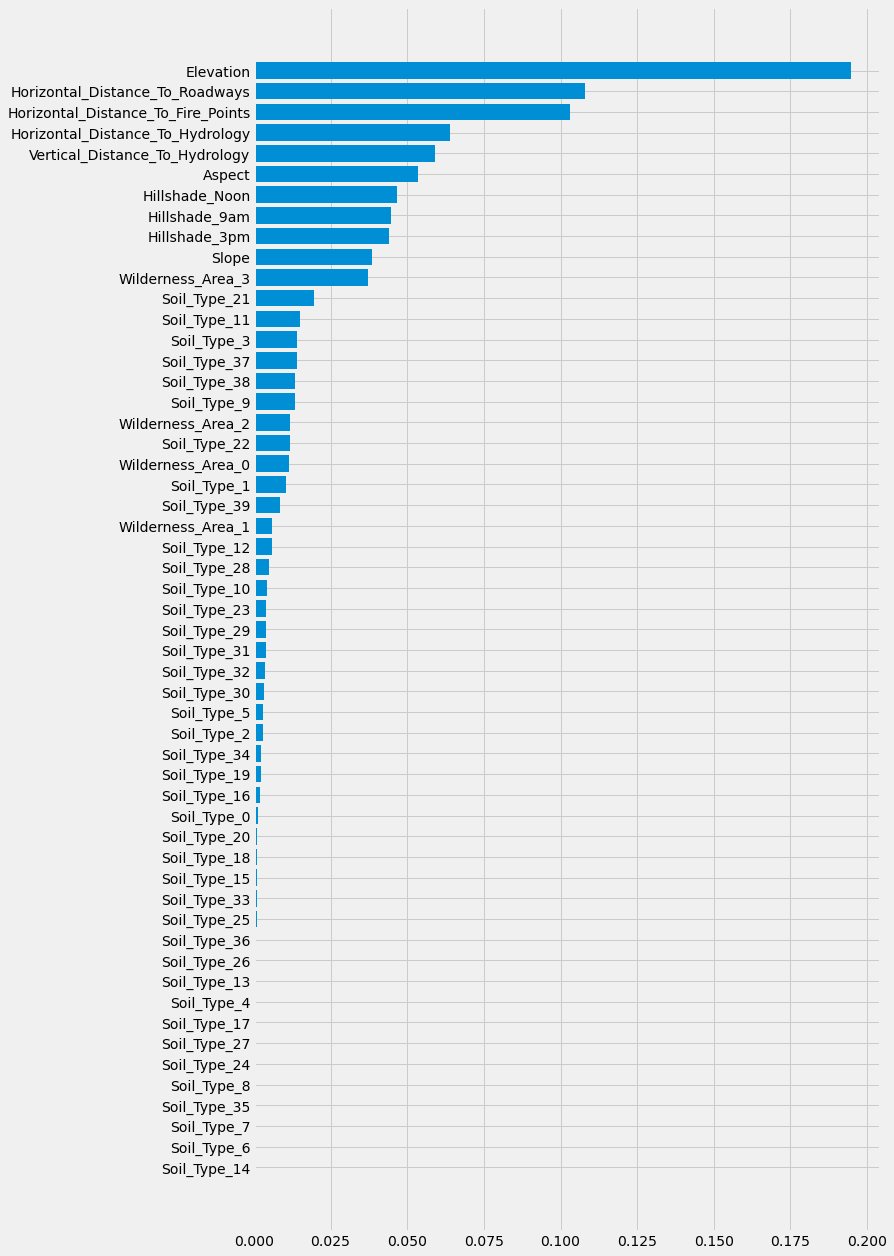

In [34]:
corr3last = corr3last.sort_values(ascending=True)
plt.figure(figsize=(10,21))
plt.barh(corr3last.index, corr3last)
plt.show()

### Получил теже самые признаки по качеству...
#### Самые важные:

Elevation                             0.199688
Horizontal_Distance_To_Roadways       0.108412
Horizontal_Distance_To_Fire_Points    0.102865
Horizontal_Distance_To_Hydrology      0.064050
Vertical_Distance_To_Hydrology        0.058943
Aspect                                0.053179
Hillshade_Noon                        0.046447
Hillshade_9am                         0.044242
Hillshade_3pm                         0.044062

In [39]:
### Подготовлю данные для построения графика зависимости качества модели от количества отобранных признаков
### В данном случае ограничиваюсь 15 точками (оганичил времы выполнения)...

corr3last = corr3last.sort_values(ascending=False)

xx3=[]
yy3=[]
cols3=['Cover_Type']
interval = range(0, 15, 1)
for i in interval:
    xx3.append(i+1)
    cols3.append(corr3last.index[i])
    yy3.append(get_score_etc(data[cols3]))
yy3

[0.6717860749036166,
 0.6345293280704976,
 0.8313865430512208,
 0.9296000091793648,
 0.9476145125757297,
 0.960184505232238,
 0.9567307692307693,
 0.9490201028088856,
 0.9515214797136038,
 0.9418372498623095,
 0.9399669542867634,
 0.9394563521204332,
 0.9392326051037269,
 0.9352625298329356,
 0.9328873691940518]

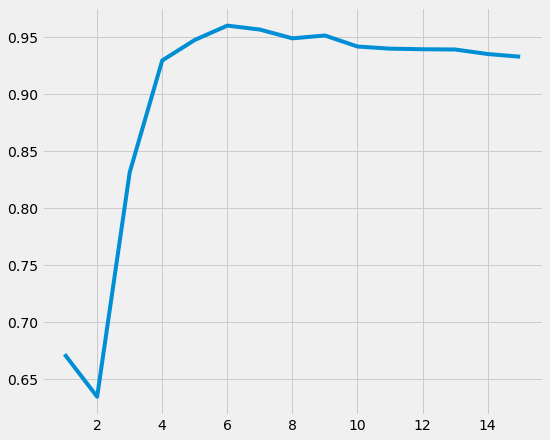

<Figure size 720x1512 with 0 Axes>

In [40]:
fig3, ax3 = plt.subplots()
ax3 = ax3.plot(xx3,yy3)
plt.figure(figsize=(10,21))
plt.show()

### В 6 точке добиваемся лучшего результата: 0.960184505232238
### Если бы построил график со всеми параметрами то в конце получил результат: 0.9509936662382963

# Все варианты показали разный результат. И это правильно.

# В любом случае при обучении надо каждый раз выбирать количество и качество параметров на которых проводить обучение.

#### По данному варианту решения не дождался (очень долго)...
#### Соответсвенно, его не доделал.
#### Изначально уменьшать количество параметров не стал.

In [ ]:
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector

In [310]:
# Определяю функцию
def get_score_ffs(ddaa):
    DATA_v = ddaa.drop('Cover_Type', axis=1)
    target_v = ddaa['Cover_Type']
    
    lr = LogisticRegression(class_weight = 'balanced', solver = 'lbfgs', random_state=42, n_jobs=-1, max_iter=50)
    ffs = SequentialFeatureSelector(lr, k_features='best', forward = True, n_jobs=-1)
    
    X_train, X_test, y_train, y_test = train_test_split(DATA_v, target_v, test_size=0.3, random_state=42)  
    ffs.fit(X_train, y_train)
    
    features = list(ffs.k_feature_names_)
    features = list(map(int, features))
    y_pred = lr.predict(X_train[features])
    
    return y_pred

In [ ]:
get_score_ffs(data)